In [96]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [97]:
#Load Data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns=iris.feature_names[:])
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [99]:
# preprocessing 1 - Feature scaling
# rescale a range between an arbitrary set of values [a, b] where a=-1, b=1
scaler = MinMaxScaler(feature_range=(-1, 1)) # build the scaler model
X_rescaled_features = scaler.fit_transform(X) 
X_rescaled_features = pd.DataFrame(X_rescaled_features[:, :], columns=iris.feature_names[:])
print(X_rescaled_features)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.555556          0.250000          -0.864407         -0.916667
1            -0.666667         -0.166667          -0.864407         -0.916667
2            -0.777778          0.000000          -0.898305         -0.916667
3            -0.833333         -0.083333          -0.830508         -0.916667
4            -0.611111          0.333333          -0.864407         -0.916667
..                 ...               ...                ...               ...
145           0.333333         -0.166667           0.423729          0.833333
146           0.111111         -0.583333           0.355932          0.500000
147           0.222222         -0.166667           0.423729          0.583333
148           0.055556          0.166667           0.491525          0.833333
149          -0.111111         -0.166667           0.389831          0.416667

[150 rows x 4 columns]


In [100]:
Y = pd.DataFrame(iris.target, columns=["Species"])
# Species are setosa,versicolor,virginica
print(Y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [101]:
# preprocessing 1 - Feature scaling
Y_rescaled_features = scaler.fit_transform(Y)
Y_rescaled_features = pd.DataFrame(Y_rescaled_features, columns=["Species"])
print(Y_rescaled_features)

     Species
0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
..       ...
145      1.0
146      1.0
147      1.0
148      1.0
149      1.0

[150 rows x 1 columns]


In [102]:
# Train the model on the data
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled_features, Y_rescaled_features, test_size=0.25)

In [104]:
X_train.shape 

(112, 4)

In [105]:
X_train[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,-0.833333,-0.083333,-0.830508,-0.916667
112,0.388889,-0.166667,0.525424,0.666667
100,0.111111,0.083333,0.694915,1.000000
34,-0.666667,-0.083333,-0.830508,-0.916667
16,-0.388889,0.583333,-0.898305,-0.750000


In [106]:
X_test.shape

(38, 4)

In [107]:
Y_train.shape 

(112, 1)

In [108]:
Y_test.shape 

(38, 1)

In [109]:
Y_test[0:10]

,Species
49,-1.0
129,1.0
87,0.0
67,0.0
15,-1.0
91,0.0
0,-1.0
40,-1.0
24,-1.0
76,0.0


In [110]:
# Now let's fit a DecisionTreeClassifier instance
Dtree = DecisionTreeClassifier(max_depth=5)
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [111]:
Dtree.score(X_test, Y_test)

0.9473684210526315

In [112]:
# Making a Prediction on a new sample 
sample_data1 = int(Dtree.predict([[5, 5, 1, 3]]))
print(iris.target_names[sample_data1])

versicolor


In [113]:
sample_data1 = int(Dtree.predict([[5, 5, 2.6, 1.5]]))
print(iris.target_names[sample_data1])

versicolor


In [114]:
sample_data1 = int(Dtree.predict([[5, 5, 15, 5]]))
print(iris.target_names[sample_data1])

versicolor


In [115]:
sample_data1 = int(Dtree.predict([[1.3, 7, 2.5, 4]]))
print(iris.target_names[sample_data1])

versicolor


In [117]:
# tree.plot_tree(Dtree)
# plt.show()

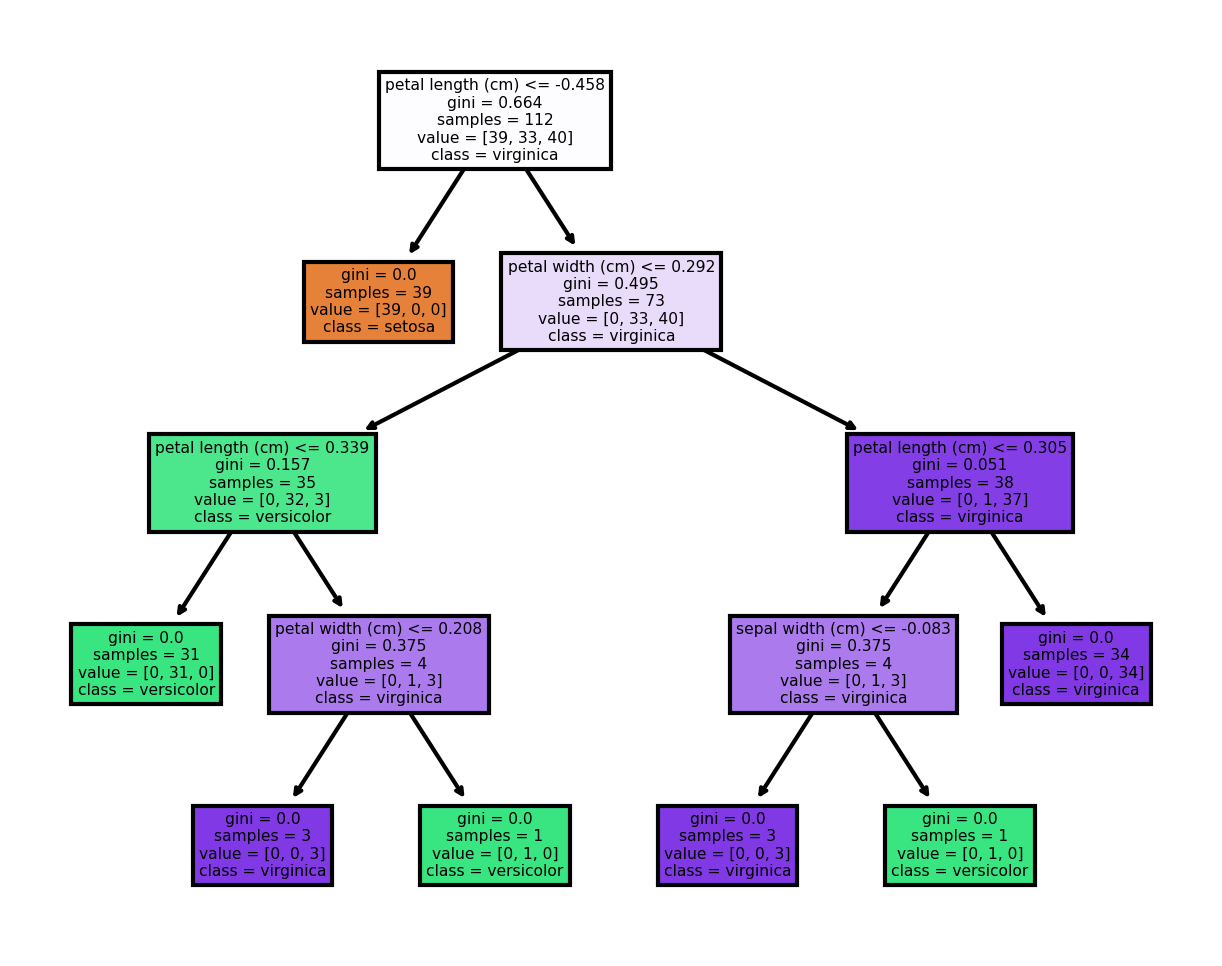

In [118]:
# Visualizing the build Decision tree
#     gini is a measure that is used to find a node to split on it
#     samples refer to the number of samples that are entering this node
#     value is a split of the data instances according to their class 
#     value = [instances_num_of_setosa, instances_num_of_versicolor, instances_num_of_virginica]
#     class is what the decision tree would predict

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)

tree.plot_tree(Dtree,
           feature_names = fn, 
           class_names=cn,
           filled = True);